#Número de datos obtenidos y perdidos

* Importamos las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

* Importamos las librerías creadas para trabajar

In [3]:
import ext_datos as ext
import procesar as pro
import time_plot as tplt

* Generamos los datasets de todos los días

* Notas:

    - Se leeran los archivos guardados en una carpeta por dia
    
    - El problema de la configuración actual de la telemetría del
        auto solar es que usa software hecho para registrar datos de
        un motor a la vez, lo que nos obliga a usar dos instancias
        cada una de las cuales escribe un archivo de datos diferente,
        sin embargo el protocolo tcp/ip si pierde momentáneamente
        la conexión intenta reconectar automáticamente y los programas
        se reconectan al primer motor que detectan.
    
    - Esto genera archivos mezclados, datos duplicados y pérdidas de
        datos
    
    - Cree un script que automatiza separar los motores, fusiona
        los datos duplicados y junta en una sola tabla ambos motores.

* En primer lugar se extraen los datos de todos los archivos
    de cada día y se genera una lista de tablas separadas por motor

In [4]:
dia1 = ext.extraer_data('dia1')

In [5]:
cd ..

c:\Users\Angelica\dataTritiumWS22


In [6]:
dia2 = ext.extraer_data('dia2')

In [7]:
cd ..

c:\Users\Angelica\dataTritiumWS22


In [8]:
dia3 = ext.extraer_data('dia3')

In [9]:
cd ..

c:\Users\Angelica\dataTritiumWS22


In [10]:
dia4 = ext.extraer_data('dia4')

* Se procesan las listas anteriores, se concatenan por motor según
    la hora de los registros y se rellenan los espacios vacíos con
    datos NaN, luego se juntan de costado las tablas (join) y se
    le añade el sufijo _m1 y _m2 para diferenciar las columnas

In [11]:
motoresdia1 = pro.procesar(dia1)

In [12]:
motoresdia2 = pro.procesar(dia2)

In [13]:
motoresdia3 = pro.procesar(dia3)

In [16]:
motoresdia4 = pro.procesar(dia4)

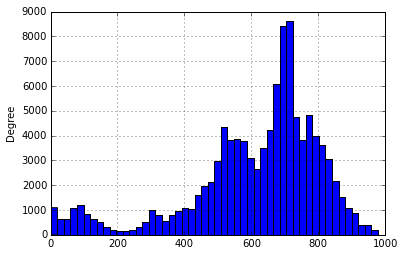

In [26]:
motoresdia4.motorRpm_m1[motoresdia4.motorRpm_m1>1].plot(kind='hist', bins=50)

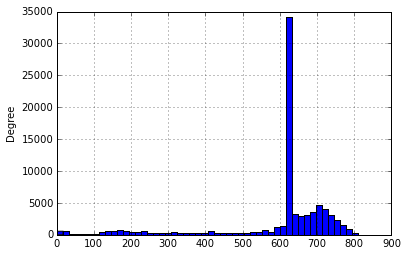

In [30]:
motoresdia1.motorRpm_m2[motoresdia1.motorRpm_m2>1].plot(kind='hist', bins=50)

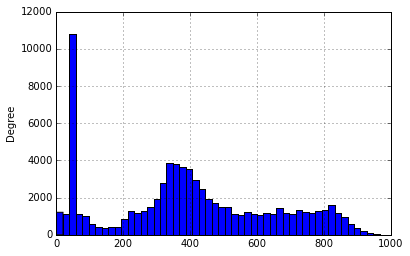

In [32]:
motoresdia2.motorRpm_m1[motoresdia2.motorRpm_m1>1].plot(kind='hist', bins=50)

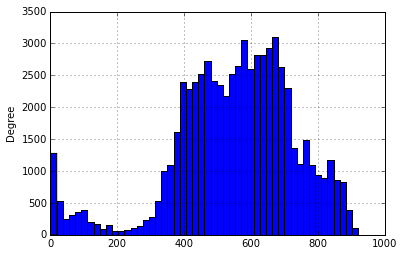

In [35]:
motoresdia3.motorRpm_m1[motoresdia3.motorRpm_m1>1].plot(kind='hist', bins=50)

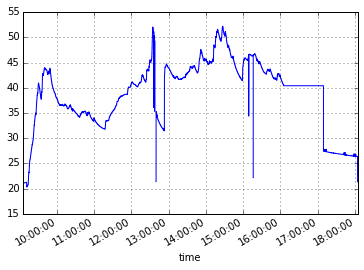

In [38]:
motoresdia4.motorTemp_m1.plot()

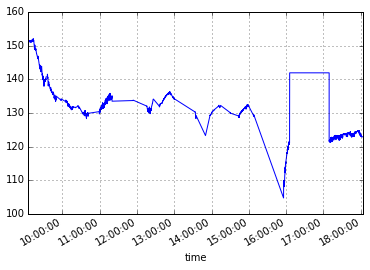

In [45]:
motoresdia4[motoresdia4.busCurrent_m1 == 0].busVoltage_m1.plot()

In [56]:
motoresdia4[motoresdia4.motorRpm_m1>1].motorRpm_m1.mean()

610.61770051836459

In [60]:
motoresdia3[motoresdia3.motorRpm_m1>1].motorRpm_m1.mean()

549.39086534146429

In [64]:
motoresdia2[motoresdia2.motorRpm_m1>1].motorRpm_m1.mean()

400.69051094898401

In [68]:
motoresdia1[motoresdia1.motorRpm_m2>1].motorRpm_m2.mean()

599.72058330214747